In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-py3-none-any.whl size=6083 sha256=2f230bf6e906ef1d9ab92230fd7737dcbbf0aa81e375a4221221183518f914d1
  Stored in directory: /root/.cache/pip/wheels/64/80/6e/caa3e16deb0267c3cbfd36862058a724144e19fdb9eb03af0f
Successfully built ffmpeg


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import fastai
from fastai.vision import *
fastai.__version__

'1.0.61'

In [ ]:
learn = load_learner('/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/')

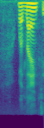

In [ ]:
f = '/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/Data/spectrograms/train/Mike_chunk402.png'
img = Image.open(f)
img

In [ ]:
dan_sample = '/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/Data/spectrograms/valid/Dan_chunk133.png'
ed_sample = '/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/Data/spectrograms/valid/Ed_chunk429.png'
hom_sample = '/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/Data/spectrograms/valid/Hom_chunk346.png'
juan_sample = '/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/Data/spectrograms/valid/Juan_chunk240.png'
mike_sample = '/content/drive/MyDrive/Colab Notebooks/GBCLessons/Math 2/classifier/Data/spectrograms/valid/Mike_chunk197.png'

In [ ]:
img = open_image(dan_sample)
speaker_name,_,prob = learn.predict(img)
speaker_name

Category tensor(0)

In [ ]:
img = open_image(ed_sample)
speaker_name,_,prob = learn.predict(img)
speaker_name

Category tensor(1)

In [ ]:
img = open_image(hom_sample)
speaker_name,_,prob = learn.predict(img)
speaker_name

Category tensor(2)

In [ ]:
img = open_image(juan_sample)
speaker_name,_,prob = learn.predict(img)
speaker_name

Category tensor(3)

In [ ]:
img = open_image(mike_sample)
speaker_name,_,prob = learn.predict(img)
speaker_name

Category tensor(4)